# Load LGMR data

In [3]:
import xarray as xr
# import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)


# Load the LGMR classes mask
# read the label_check
import pickle
with open('ens_ana_data/label_check_with_prob.pkl', 'rb') as f:
    label_check = pickle.load(f)

# Load TraCE all

Ref: He et al., 2011, SIMULATING TRANSIENT CLIMATE EVOLUTION OF THE LAST DEGLACIATION WITH CCSM3

In [1]:
import xarray as xr

def pre_process_trace_data(file_path):
    """
    Reads and preprocesses TraCE .nc data file.

    Parameters:
    file_path (str): Path to the .nc data file.

    Returns:
    xarray.Dataset: Preprocessed dataset with temperature in degrees Celsius and age in years BP.
    """
    # Import .nc data
    ds = xr.open_dataset(file_path)
    
    # Rename variables for clarity
    ds = ds.rename({'TREFHT': 'sat', 'time': 'age'})
    
    # Convert 'age' from model time to years BP (before present)
    ds['age'] = ds['age'] * -1000  # Assuming 'time' is in thousands of years
    
    # Convert temperature from Kelvin to Celsius
    ds['sat'] = ds['sat'] - 273.15
    
    # Keep only the 'sat' variable
    ds = ds[['sat']]
    
    return ds

trace_all_path='TraCE_data/trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc'
trace_ghg_path='data_fig3/b30.00_4kaDVTk.cam2.ncrcat.ann.nc'
trace_orb_path='TraCE_data/b30.00_4kaDVTj.cam2.ncrcat.ann.nc'
trace_icesheet_path='TraCE_data/b30.00_4kaDVTz.cam2.ncrcat.ann.nc'
trace_fwf_path='TraCE_data/b30.00_4kaDVTn.cam2.ncrcat.ann.nc'

ds_trace_all = pre_process_trace_data(trace_all_path)
ds_trace_ghg = pre_process_trace_data(trace_ghg_path)
ds_trace_orb = pre_process_trace_data(trace_orb_path)
ds_trace_icesheet = pre_process_trace_data(trace_icesheet_path)
ds_trace_fwf = pre_process_trace_data(trace_fwf_path)



shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (2204, 13824)


TraCE all


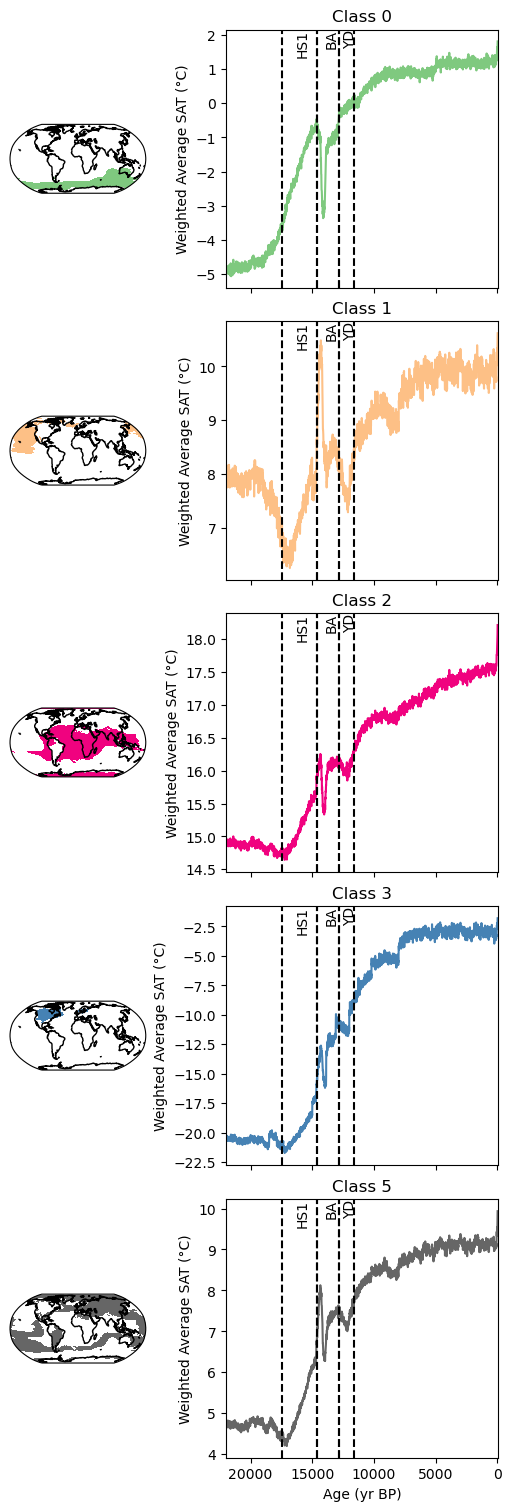

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (2204, 13824)


TraCE ghg


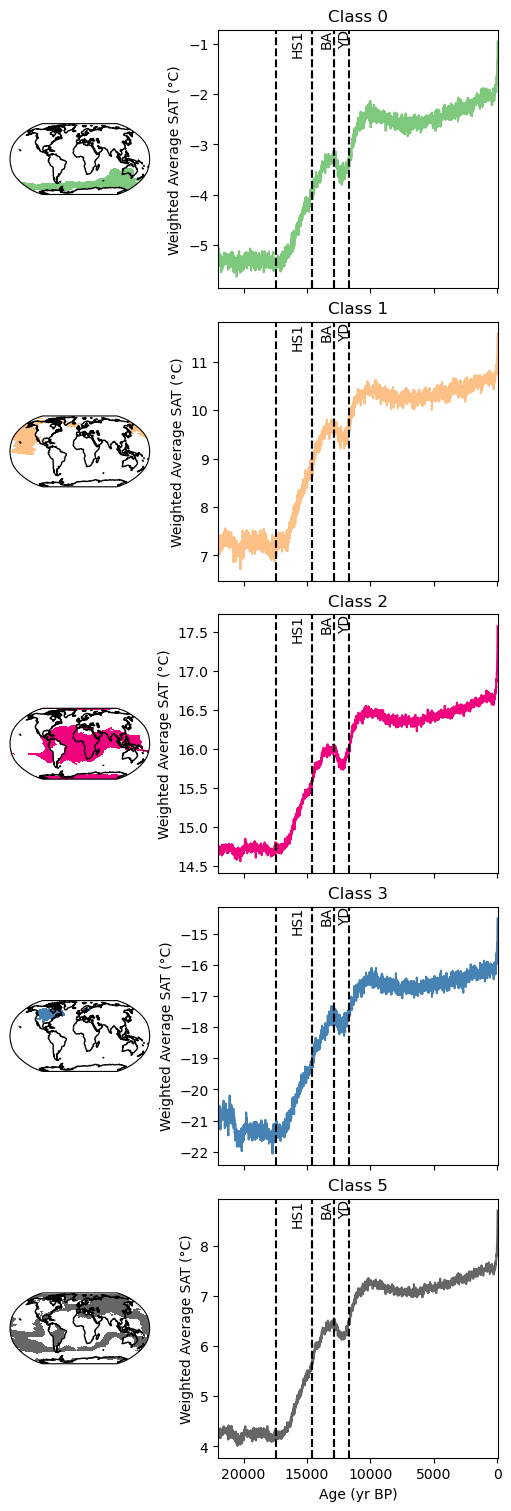

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (2204, 13824)


TraCE orb


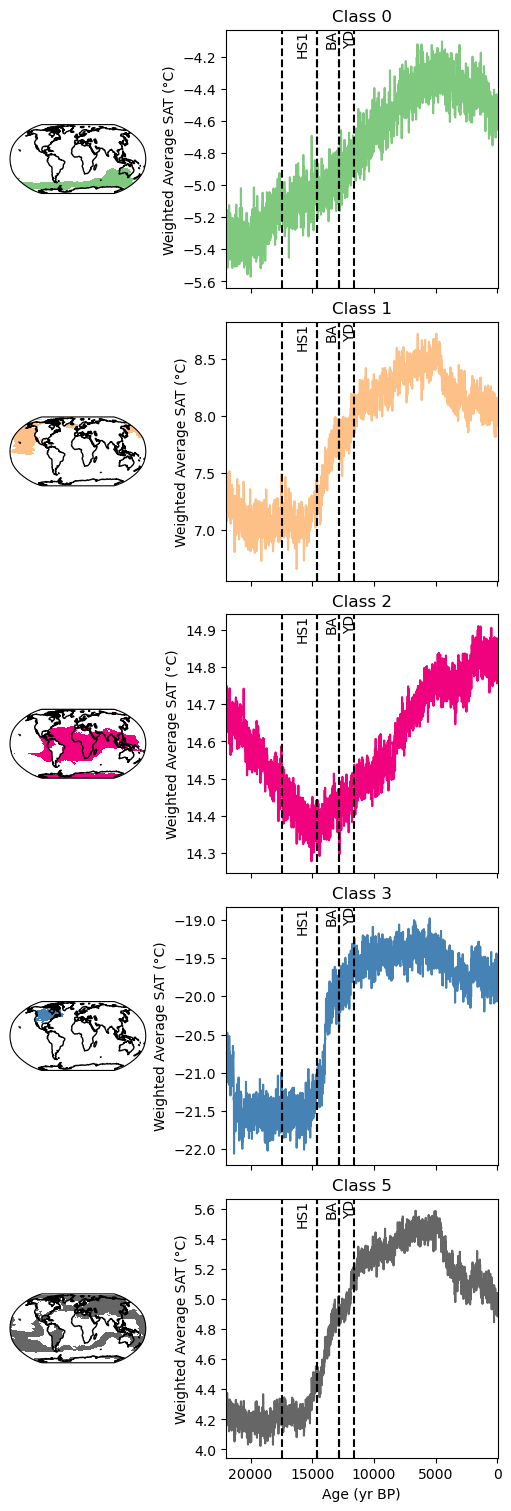

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (1904, 13824)


TraCE ice sheet


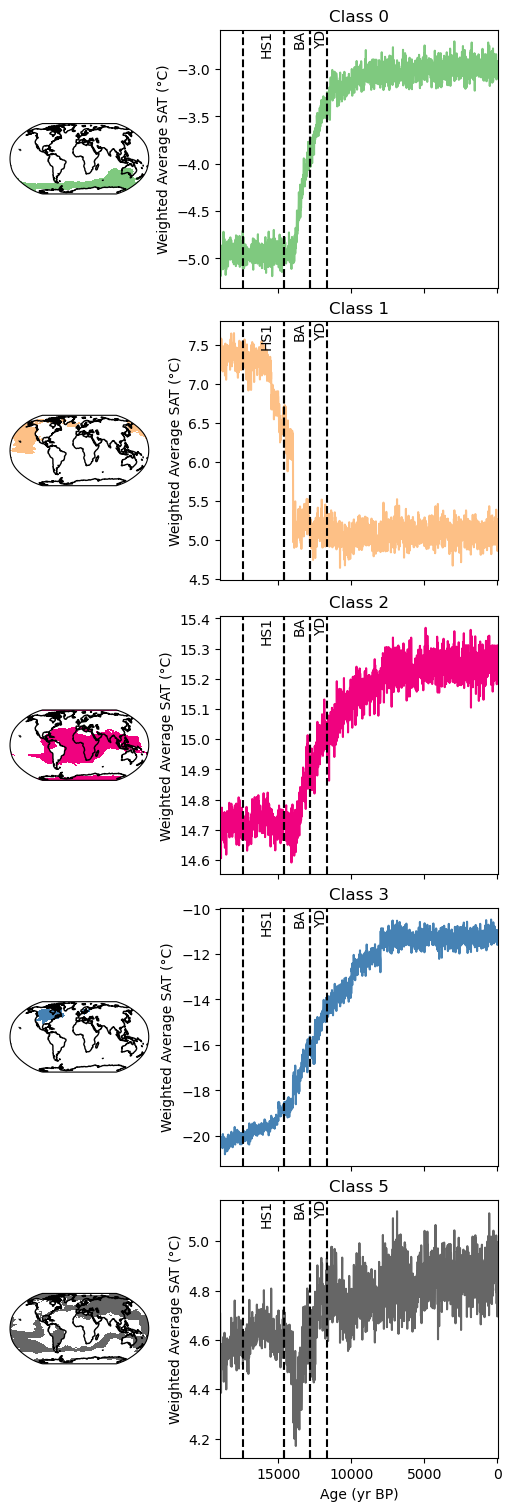

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (1904, 13824)


TraCE fwf


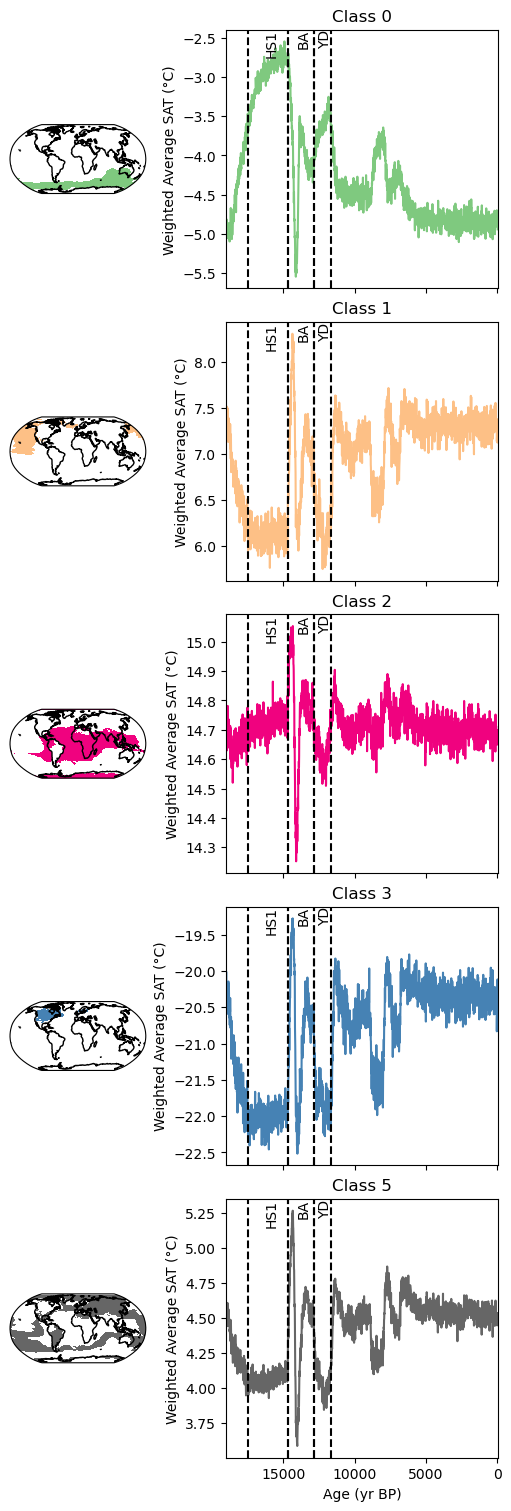

In [11]:
import xarray as xr
from toolbox import PCA_functions as pf
from toolbox import GMM_functions as gfs

def sample_trace_data_with_LGMR_mask(ds_sat, ds_trace, label_check, trace_label=''):
    """
    Interpolates the TraCE dataset to the LGMR grid, applies class labels,
    centers and weights the data, and plots the weighted average curve.

    Parameters:
    ds_sat (xarray.Dataset): The LGMR dataset containing 'class_relabeled' and coordinate grids.
    ds_trace (xarray.Dataset): The TraCE dataset to be interpolated and processed.
    label_check (numpy.ndarray): Array used to create 'class_relabeled_checked'.

    Returns:
    tuple: Processed TraCE dataset and the weighted average curves.
    """
    # Define the new grid to interpolate to (using ds_sat's grid)
    new_lat = ds_sat.lat
    new_lon = ds_sat.lon

    # Perform the interpolation
    ds_trace_interpolated = ds_trace.interp(lat=new_lat, lon=new_lon, method='linear')

    # Assign class labels
    ds_trace_interpolated['class_relabeled'] = ds_sat['class_relabeled']
    ds_trace_interpolated['class_relabeled_checked'] = (('lat', 'lon'), label_check.reshape(96, 144))

    # 1. Center the Data
    ds_trace_interpolated = pf.center_data(ds_trace_interpolated)

    # 2. Weight the Data
    ds_trace_interpolated = pf.apply_weighting(ds_trace_interpolated)

    # print the trace_label
    print('\n')
    print(trace_label)

    # 3. Plot weighted average curve
    weighted_avg_curves = gfs.plot_weighted_average_curve(
        ds_trace_interpolated.copy(),
        label_var_name='class_relabeled_checked',
        dpi=100
    )

    return ds_trace_interpolated, weighted_avg_curves

ds_trace_all, TraCE_all_weighted_avg_LGMR_mask=sample_trace_data_with_LGMR_mask(ds_sat, ds_trace_all, label_check,trace_label='TraCE all')
ds_trace_ghg, TraCE_ghg_weighted_avg_LGMR_mask=sample_trace_data_with_LGMR_mask(ds_sat, ds_trace_ghg, label_check,trace_label='TraCE ghg')
ds_trace_orb, TraCE_orb_weighted_avg_LGMR_mask=sample_trace_data_with_LGMR_mask(ds_sat, ds_trace_orb, label_check,trace_label='TraCE orb')
ds_trace_icesheet, TraCE_icesheet_weighted_avg_LGMR_mask=sample_trace_data_with_LGMR_mask(ds_sat, ds_trace_icesheet, label_check,trace_label='TraCE ice sheet')
ds_trace_fwf, TraCE_fwf_weighted_avg_LGMR_mask=sample_trace_data_with_LGMR_mask(ds_sat, ds_trace_fwf, label_check,trace_label='TraCE fwf')


In [10]:
TraCE_all_weighted_avg_LGMR_mask

(<xarray.Dataset>
 Dimensions:                  (age: 2204, lat: 96, lon: 144)
 Coordinates:
   * age                      (age) float64 2.2e+04 2.199e+04 ... -20.0 -30.0
   * lat                      (lat) float32 -90.0 -88.11 -86.21 ... 88.11 90.0
   * lon                      (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
 Data variables:
     sat                      (age, lat, lon) float64 nan nan nan ... nan nan nan
     class_relabeled          (lat, lon) int32 ...
     class_relabeled_checked  (lat, lon) int32 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2
     sat_centered             (age, lat, lon) float64 nan nan nan ... nan nan nan
     weight                   (lat) float32 0.0 0.03306 0.06609 ... 0.03306 0.0
     sat_centered_weighted    (age, lat, lon) float64 nan nan nan ... nan nan nan
 Attributes:
     Conventions:               CF-1.0
     source:                    CAM
     case:                      b30.22_0kaDVT
     title:                     b30.22_0kaDVT b30.22_0kaDVT

# LGMR VS TraCE all

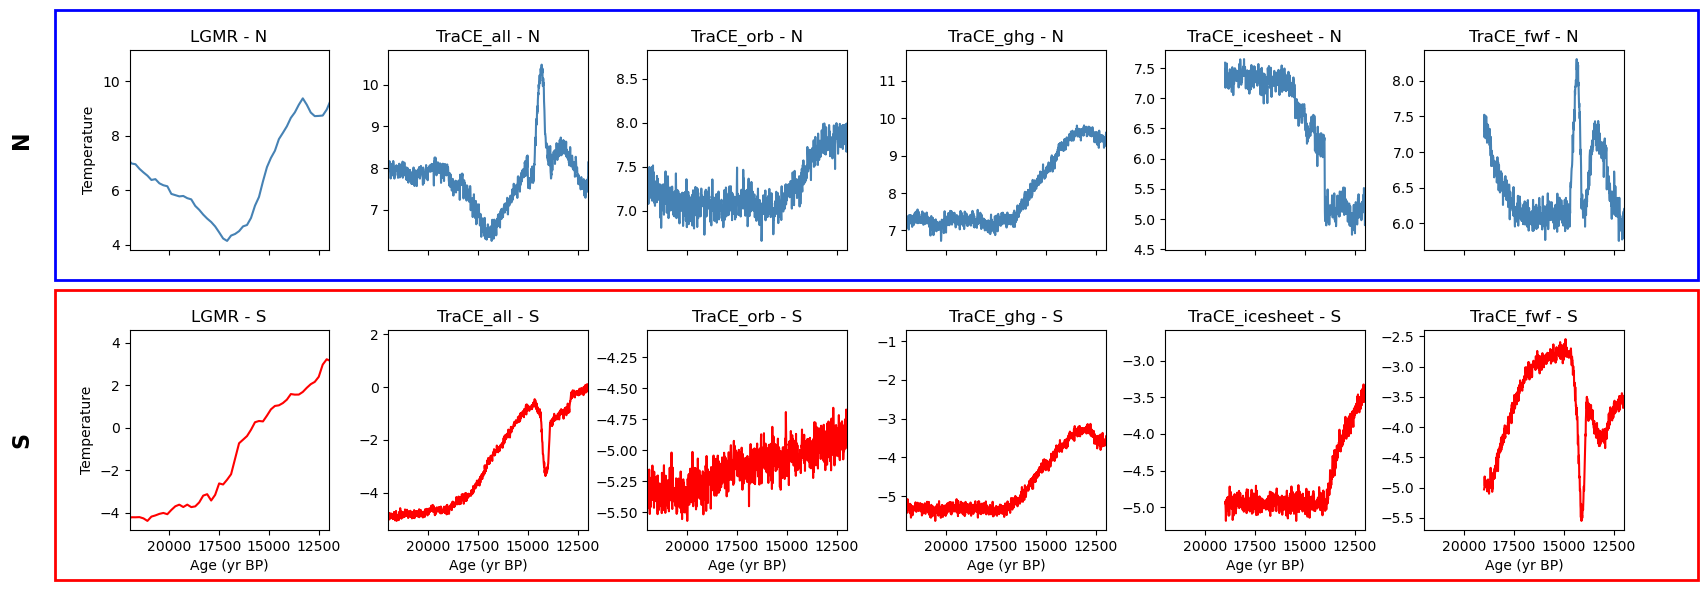

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.transforms import Bbox

LGMR_S= [curves[0] for curves in all_weighted_avg_curves]
# calculate the median
LGMR_S = np.median(LGMR_S, axis=0)

LGMR_N= [curves[1] for curves in all_weighted_avg_curves]
# calculate the median
LGMR_N = np.median(LGMR_N, axis=0)
LGMR_age=ds_sat['age'].values

trace_all_S=TraCE_all_weighted_avg_LGMR_mask[0]
trace_all_N=TraCE_all_weighted_avg_LGMR_mask[1]
trace_age=ds_trace_all['age'].values

trace_orb_S=TraCE_orb_weighted_avg_LGMR_mask[0]
trace_orb_N=TraCE_orb_weighted_avg_LGMR_mask[1]
trace_orb_age=ds_trace_orb['age'].values

trace_ghg_S=TraCE_ghg_weighted_avg_LGMR_mask[0]
trace_ghg_N=TraCE_ghg_weighted_avg_LGMR_mask[1]
trace_ghg_age=ds_trace_ghg['age'].values


trace_icesheet_S=TraCE_icesheet_weighted_avg_LGMR_mask[0]
trace_icesheet_N=TraCE_icesheet_weighted_avg_LGMR_mask[1]
trace_icesheet_age=ds_trace_icesheet['age'].values

# generate some random data with shape of (len(trace_icesheet_age),)
trace_fwf_S=TraCE_fwf_weighted_avg_LGMR_mask[0]
trace_fwf_N=TraCE_fwf_weighted_avg_LGMR_mask[1]
trace_fwf_age=ds_trace_fwf['age'].values

datasets = [
    {'name': 'LGMR', 'N': LGMR_N, 'S': LGMR_S, 'age': LGMR_age},
    {'name': 'TraCE_all', 'N': trace_all_N, 'S': trace_all_S, 'age': trace_age},
    {'name': 'TraCE_orb', 'N': trace_orb_N, 'S': trace_orb_S, 'age': trace_orb_age},
    {'name': 'TraCE_ghg', 'N': trace_ghg_N, 'S': trace_ghg_S, 'age': trace_ghg_age},
    {'name': 'TraCE_icesheet', 'N': trace_icesheet_N, 'S': trace_icesheet_S, 'age': trace_icesheet_age},
    {'name': 'TraCE_fwf', 'N': trace_fwf_N, 'S': trace_fwf_S, 'age': trace_fwf_age}
]

fig, axs = plt.subplots(2, 6, figsize=(18, 6), sharex=True, sharey=False)
plt.subplots_adjust(wspace=0.3, hspace=0.4, left=0.12, right=0.95, top=0.9, bottom=0.1)

for col, dataset in enumerate(datasets):
    for row in [0, 1]:
        ax = axs[row, col]
        if row == 0:
            data = dataset['N']
            label = dataset['name'] + ' - N'
            # ax.set_ylim(-1, 11)
        else:
            data = dataset['S']
            label = dataset['name'] + ' - S'
            # ax.set_ylim(-6, 5)
        age = dataset['age']
        
        ax.set_title(label)
        ax.set_xlim([22000, 12000])
        if col == 0:
            ax.set_ylabel('Temperature')
        if row==0:
            ax.plot(age, data,'steelblue')
        if row == 1:
            ax.plot(age, data,'r')  
            ax.set_xlabel('Age (yr BP)')

# axs[0,0].set_ylim=[2,11]


fig.text(0.06, 0.75, 'N', ha='center', va='center', fontsize=16, rotation='vertical', fontweight='bold')
fig.text(0.06, 0.25, 'S', ha='center', va='center', fontsize=16, rotation='vertical', fontweight='bold')

def add_row_rectangle(axs_row, color, alpha, lower_ratio, high_ratio=1.35):
    positions = [ax.get_position() for ax in axs_row]
    bbox = Bbox.union(positions)
    rect = Rectangle((bbox.x0-0.05*bbox.width, bbox.y0-lower_ratio*bbox.height), 1.1*bbox.width, high_ratio*bbox.height,
                     linewidth=2, edgecolor=color, facecolor='none', alpha=alpha,
                     transform=fig.transFigure, zorder=1)  # Set z-order to 1 to ensure it is above the background
    fig.add_artist(rect)

add_row_rectangle(axs[0, :], color='b', alpha=1, lower_ratio=0.15)
add_row_rectangle(axs[1, :], color='r', alpha=1, lower_ratio=0.25, high_ratio=1.45)

plt.show()


# Normalized data

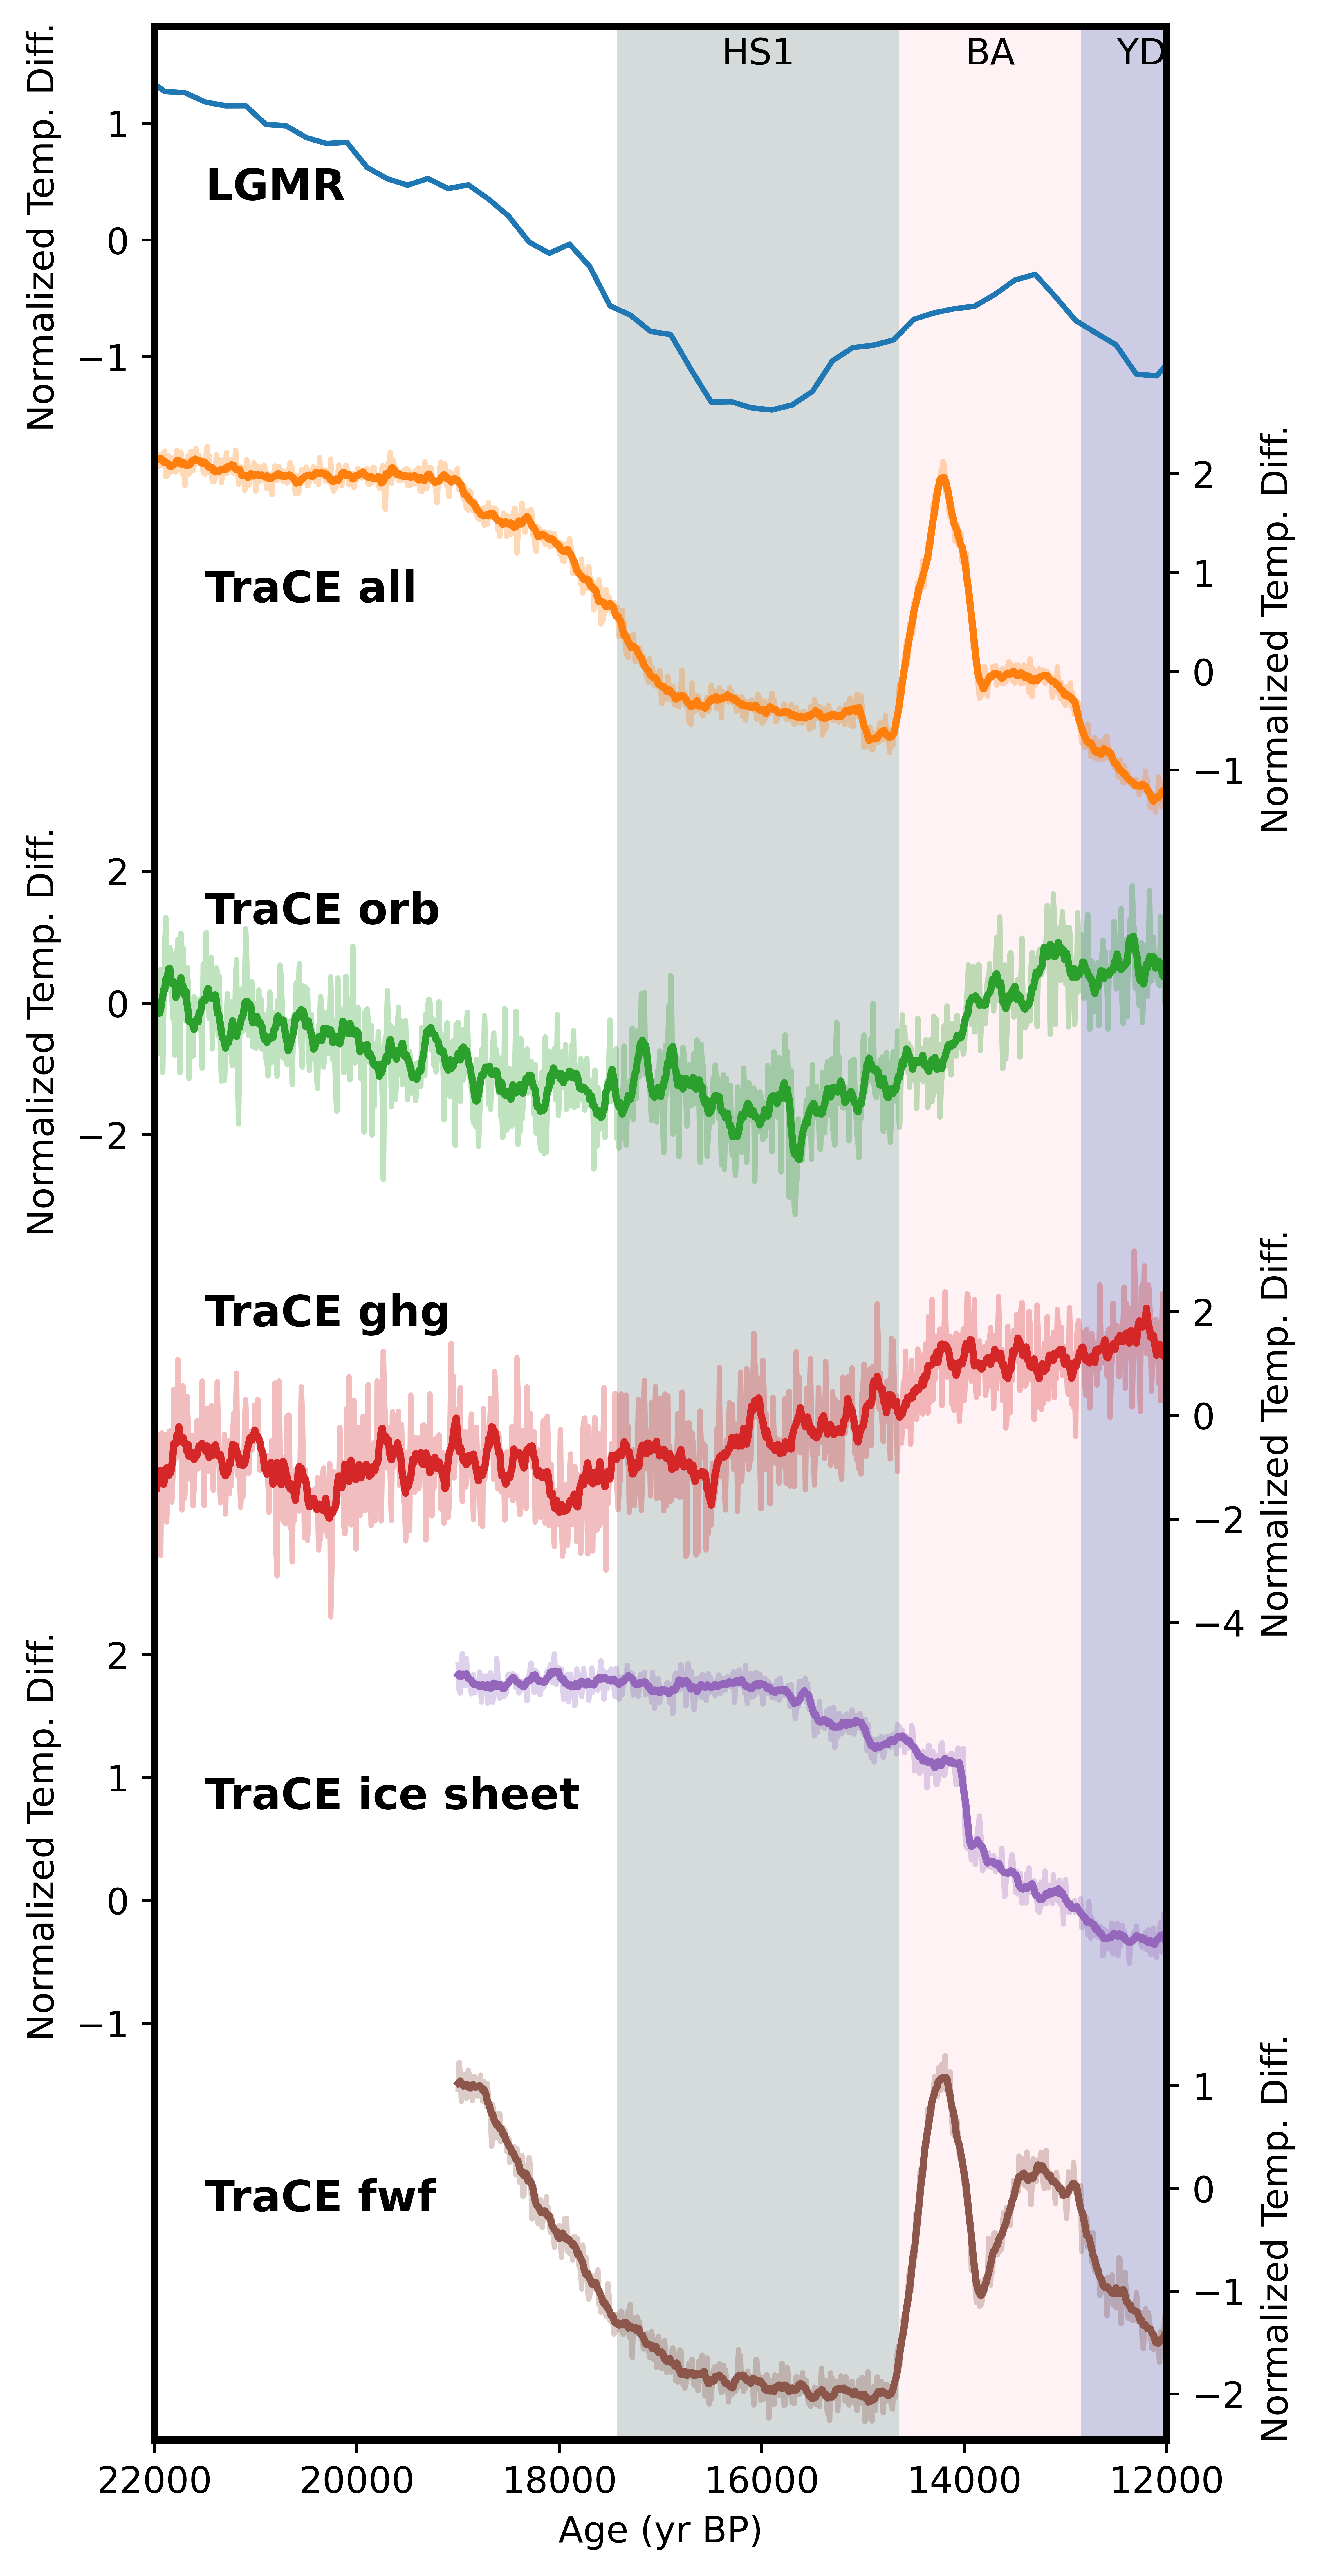

In [68]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
import pandas as pd

# # Function to compute the moving average
# def moving_average(a, n=10):
#     return np.convolve(a, np.ones(n)/n, mode='same')

def moving_average(a, n=10):
    return pd.Series(a).rolling(window=n, center=True, min_periods=1).mean().values

# Compute the normalized temperature differences and their moving averages
LGMR_N_S = zscore(LGMR_N - LGMR_S)
LGMR_N_S_ma = moving_average(LGMR_N_S, n=10)

trace_all_N_S = zscore(trace_all_N - trace_all_S)
trace_all_N_S_ma = moving_average(trace_all_N_S, n=10)

trace_orb_N_S = zscore(trace_orb_N - trace_orb_S)
trace_orb_N_S_ma = moving_average(trace_orb_N_S, n=10)

trace_ghg_N_S = zscore(trace_ghg_N - trace_ghg_S)
trace_ghg_N_S_ma = moving_average(trace_ghg_N_S, n=10)

trace_icesheet_N_S = zscore(trace_icesheet_N - trace_icesheet_S)
trace_icesheet_N_S_ma = moving_average(trace_icesheet_N_S, n=10)

trace_fwf_N_S = zscore(trace_fwf_N - trace_fwf_S)
trace_fwf_N_S_ma = moving_average(trace_fwf_N_S, n=10)


# LGMR_N_S = (LGMR_N - LGMR_S)
# LGMR_N_S_ma = moving_average(LGMR_N_S, n=10)

# trace_all_N_S = (trace_all_N - trace_all_S)
# trace_all_N_S_ma = moving_average(trace_all_N_S, n=10)

# trace_orb_N_S = (trace_orb_N - trace_orb_S)
# trace_orb_N_S_ma = moving_average(trace_orb_N_S, n=10)

# trace_ghg_N_S = (trace_ghg_N - trace_ghg_S)
# trace_ghg_N_S_ma = moving_average(trace_ghg_N_S, n=10)

# trace_icesheet_N_S = (trace_icesheet_N - trace_icesheet_S)
# trace_icesheet_N_S_ma = moving_average(trace_icesheet_N_S, n=10)

# trace_fwf_N_S = (trace_fwf_N - trace_fwf_S)
# trace_fwf_N_S_ma = moving_average(trace_fwf_N_S, n=10)


# List of datasets and their corresponding ages and labels
datasets = [
    {'age': LGMR_age, 'data': LGMR_N_S, 'label': 'LGMR-N-S'},
    {'age': trace_age, 'data': trace_all_N_S_ma, 'label': 'TraCE_all-N-S'},
    {'age': trace_orb_age, 'data': trace_orb_N_S_ma, 'label': 'TraCE_orb-N-S'},
    {'age': trace_ghg_age, 'data': trace_ghg_N_S_ma, 'label': 'TraCE_ghg-N-S'},
    {'age': trace_icesheet_age, 'data': trace_icesheet_N_S_ma, 'label': 'TraCE_icesheet-N-S'},
    {'age': trace_fwf_age, 'data': trace_fwf_N_S_ma, 'label': 'TraCE_fwf-N-S'}
]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create subplots: one for each dataset
fig, axes = plt.subplots(len(datasets), 1, figsize=(5, 12), sharex=True, dpi=900)

axes[0].plot(LGMR_age, LGMR_N_S, color=colors[0], alpha=1, label='LGMR-N-S')

axes[1].plot(trace_age, trace_all_N_S, color=colors[1], alpha=0.3)
axes[1].plot(trace_age, trace_all_N_S_ma, color=colors[1], label='TraCE_all-N-S', linewidth=2)

axes[2].plot(trace_orb_age, trace_orb_N_S, color=colors[2], alpha=0.3)
axes[2].plot(trace_orb_age, trace_orb_N_S_ma, color=colors[2], label='TraCE_orb-N-S', linewidth=2)

axes[3].plot(trace_ghg_age, trace_ghg_N_S, color=colors[3], alpha=0.3)
axes[3].plot(trace_ghg_age, trace_ghg_N_S_ma, color=colors[3], label='TraCE_ghg-N-S', linewidth=2)

axes[4].plot(trace_icesheet_age, trace_icesheet_N_S, color=colors[4], alpha=0.3)
axes[4].plot(trace_icesheet_age, trace_icesheet_N_S_ma, color=colors[4], label='TraCE_icesheet-N-S', linewidth=2)

axes[5].plot(trace_fwf_age, trace_fwf_N_S, color=colors[5], alpha=0.3)
axes[5].plot(trace_fwf_age, trace_fwf_N_S_ma, color=colors[5], label='TraCE_fwf-N-S', linewidth=2)

label_list=['LGMR','TraCE all','TraCE orb','TraCE ghg','TraCE ice sheet','TraCE fwf']

# Plot each dataset in its own subplot
for i, dataset in enumerate(datasets):
    ax = axes[i]
    # ax.plot(dataset['age'], dataset['data'], color=colors[i % len(colors)], label=dataset['label'])
    ax.set_ylabel('Normalized Temp. Diff.')
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        
    ax.set_xlim([22000, 12000])
    
    if i % 2 == 0:
        ax.yaxis.tick_left()
        ax.yaxis.set_label_position("left")
    else:
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")
    
# Hide x-axis labels for all but the last subplot
    if i>0:
        ax.spines['top'].set_visible(False)
    if i < len(datasets) - 1:
        ax.tick_params(labelbottom=False)
        # set the bottom spine invisible
        ax.spines['bottom'].set_visible(False)
    else:
        ax.set_xlabel('Age (yr BP)')

    # add text label according to the label_list at the top left concer of each subplot
    if i==2 or i==3:
        ax.text(0.05, 0.85, label_list[i], ha='left', va='top', transform=ax.transAxes, fontsize=12, fontweight='bold')
    else:
        ax.text(0.05, 0.65, label_list[i], ha='left', va='top', transform=ax.transAxes, fontsize=12, fontweight='bold')
    
# Periods for the vertical grey bars
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

def add_grey_bars(ax):

    ax.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0,zorder=-1)

for ax in axes:
    add_grey_bars(ax)

axes[0].text(x=np.mean(HS1), y=0.95 * np.max(axes[0].get_ylim()), s='HS1', ha='center', va='top')
axes[0].text(x=np.mean(BA), y=0.95 * np.max(axes[0].get_ylim()), s='BA', ha='center', va='top')
axes[0].text(x=np.mean(YD), y=0.95 * np.max(axes[0].get_ylim()), s='YD', ha='center', va='top')

# Adjust layout to remove space between subplots
plt.subplots_adjust(hspace=0)

plt.show()


# Not normalized

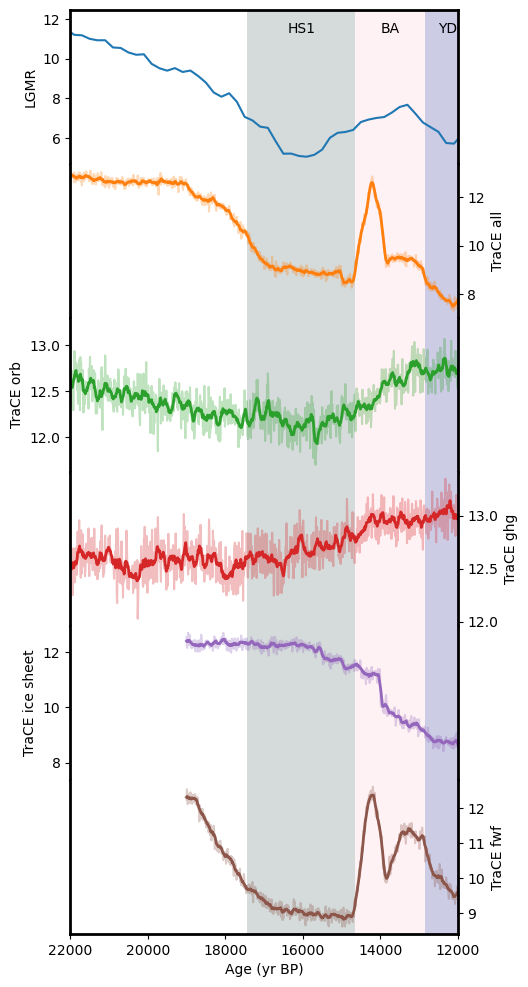

In [65]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
import pandas as pd

# # Function to compute the moving average
# def moving_average(a, n=10):
#     return np.convolve(a, np.ones(n)/n, mode='same')

def moving_average(a, n=10):
    return pd.Series(a).rolling(window=n, center=True, min_periods=1).mean().values

# Compute the normalized temperature differences and their moving averages
LGMR_N_S = (LGMR_N - LGMR_S)
LGMR_N_S_ma = moving_average(LGMR_N_S, n=10)

trace_all_N_S = (trace_all_N - trace_all_S)
trace_all_N_S_ma = moving_average(trace_all_N_S, n=10)

trace_orb_N_S = (trace_orb_N - trace_orb_S)
trace_orb_N_S_ma = moving_average(trace_orb_N_S, n=10)

trace_ghg_N_S = (trace_ghg_N - trace_ghg_S)
trace_ghg_N_S_ma = moving_average(trace_ghg_N_S, n=10)

trace_icesheet_N_S = (trace_icesheet_N - trace_icesheet_S)
trace_icesheet_N_S_ma = moving_average(trace_icesheet_N_S, n=10)

trace_fwf_N_S = (trace_fwf_N - trace_fwf_S)
trace_fwf_N_S_ma = moving_average(trace_fwf_N_S, n=10)


# List of datasets and their corresponding ages and labels
datasets = [
    {'age': LGMR_age, 'data': LGMR_N_S, 'label': 'LGMR-N-S'},
    {'age': trace_age, 'data': trace_all_N_S_ma, 'label': 'TraCE_all-N-S'},
    {'age': trace_orb_age, 'data': trace_orb_N_S_ma, 'label': 'TraCE_orb-N-S'},
    {'age': trace_ghg_age, 'data': trace_ghg_N_S_ma, 'label': 'TraCE_ghg-N-S'},
    {'age': trace_icesheet_age, 'data': trace_icesheet_N_S_ma, 'label': 'TraCE_icesheet-N-S'},
    {'age': trace_fwf_age, 'data': trace_fwf_N_S_ma, 'label': 'TraCE_fwf-N-S'}
]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create subplots: one for each dataset
fig, axes = plt.subplots(len(datasets), 1, figsize=(5, 12), sharex=True, dpi=100)

axes[0].plot(LGMR_age, LGMR_N_S, color=colors[0], alpha=1, label='LGMR-N-S')

axes[1].plot(trace_age, trace_all_N_S, color=colors[1], alpha=0.3)
axes[1].plot(trace_age, trace_all_N_S_ma, color=colors[1], label='TraCE_all-N-S', linewidth=2)

axes[2].plot(trace_orb_age, trace_orb_N_S, color=colors[2], alpha=0.3)
axes[2].plot(trace_orb_age, trace_orb_N_S_ma, color=colors[2], label='TraCE_orb-N-S', linewidth=2)

axes[3].plot(trace_ghg_age, trace_ghg_N_S, color=colors[3], alpha=0.3)
axes[3].plot(trace_ghg_age, trace_ghg_N_S_ma, color=colors[3], label='TraCE_ghg-N-S', linewidth=2)

axes[4].plot(trace_icesheet_age, trace_icesheet_N_S, color=colors[4], alpha=0.3)
axes[4].plot(trace_icesheet_age, trace_icesheet_N_S_ma, color=colors[4], label='TraCE_icesheet-N-S', linewidth=2)

axes[5].plot(trace_fwf_age, trace_fwf_N_S, color=colors[5], alpha=0.3)
axes[5].plot(trace_fwf_age, trace_fwf_N_S_ma, color=colors[5], label='TraCE_fwf-N-S', linewidth=2)

ylabel_list=['LGMR','TraCE all','TraCE orb','TraCE ghg','TraCE ice sheet','TraCE fwf']

# Plot each dataset in its own subplot
for i, dataset in enumerate(datasets):
    ax = axes[i]
    # ax.plot(dataset['age'], dataset['data'], color=colors[i % len(colors)], label=dataset['label'])
    ax.set_ylabel(ylabel_list[i])
    # set the line width for all spines
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    # ax.set_title(dataset['label'])
    # ax.legend(loc='upper right')
    # ax.legend()
    ax.set_xlim([22000, 12000])
    
    if i % 2 == 0:
        ax.yaxis.tick_left()
        ax.yaxis.set_label_position("left")
    else:
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")
    
# Hide x-axis labels for all but the last subplot
    if i>0:
        ax.spines['top'].set_visible(False)
    if i < len(datasets) - 1:
        ax.tick_params(labelbottom=False)
        # set the bottom spine invisible
        ax.spines['bottom'].set_visible(False)
    else:
        ax.set_xlabel('Age (yr BP)')

# Periods for the vertical grey bars
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

def add_grey_bars(ax):

    ax.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0,zorder=-1)

for ax in axes:
    add_grey_bars(ax)

axes[0].text(x=np.mean(HS1), y=0.95 * np.max(axes[0].get_ylim()), s='HS1', ha='center', va='top')
axes[0].text(x=np.mean(BA), y=0.95 * np.max(axes[0].get_ylim()), s='BA', ha='center', va='top')
axes[0].text(x=np.mean(YD), y=0.95 * np.max(axes[0].get_ylim()), s='YD', ha='center', va='top')

# Adjust layout to remove space between subplots
plt.subplots_adjust(hspace=0)

plt.show()


# Compare the TraCE Orb + TraCE FWF and the LGMR, centered, but not normalized

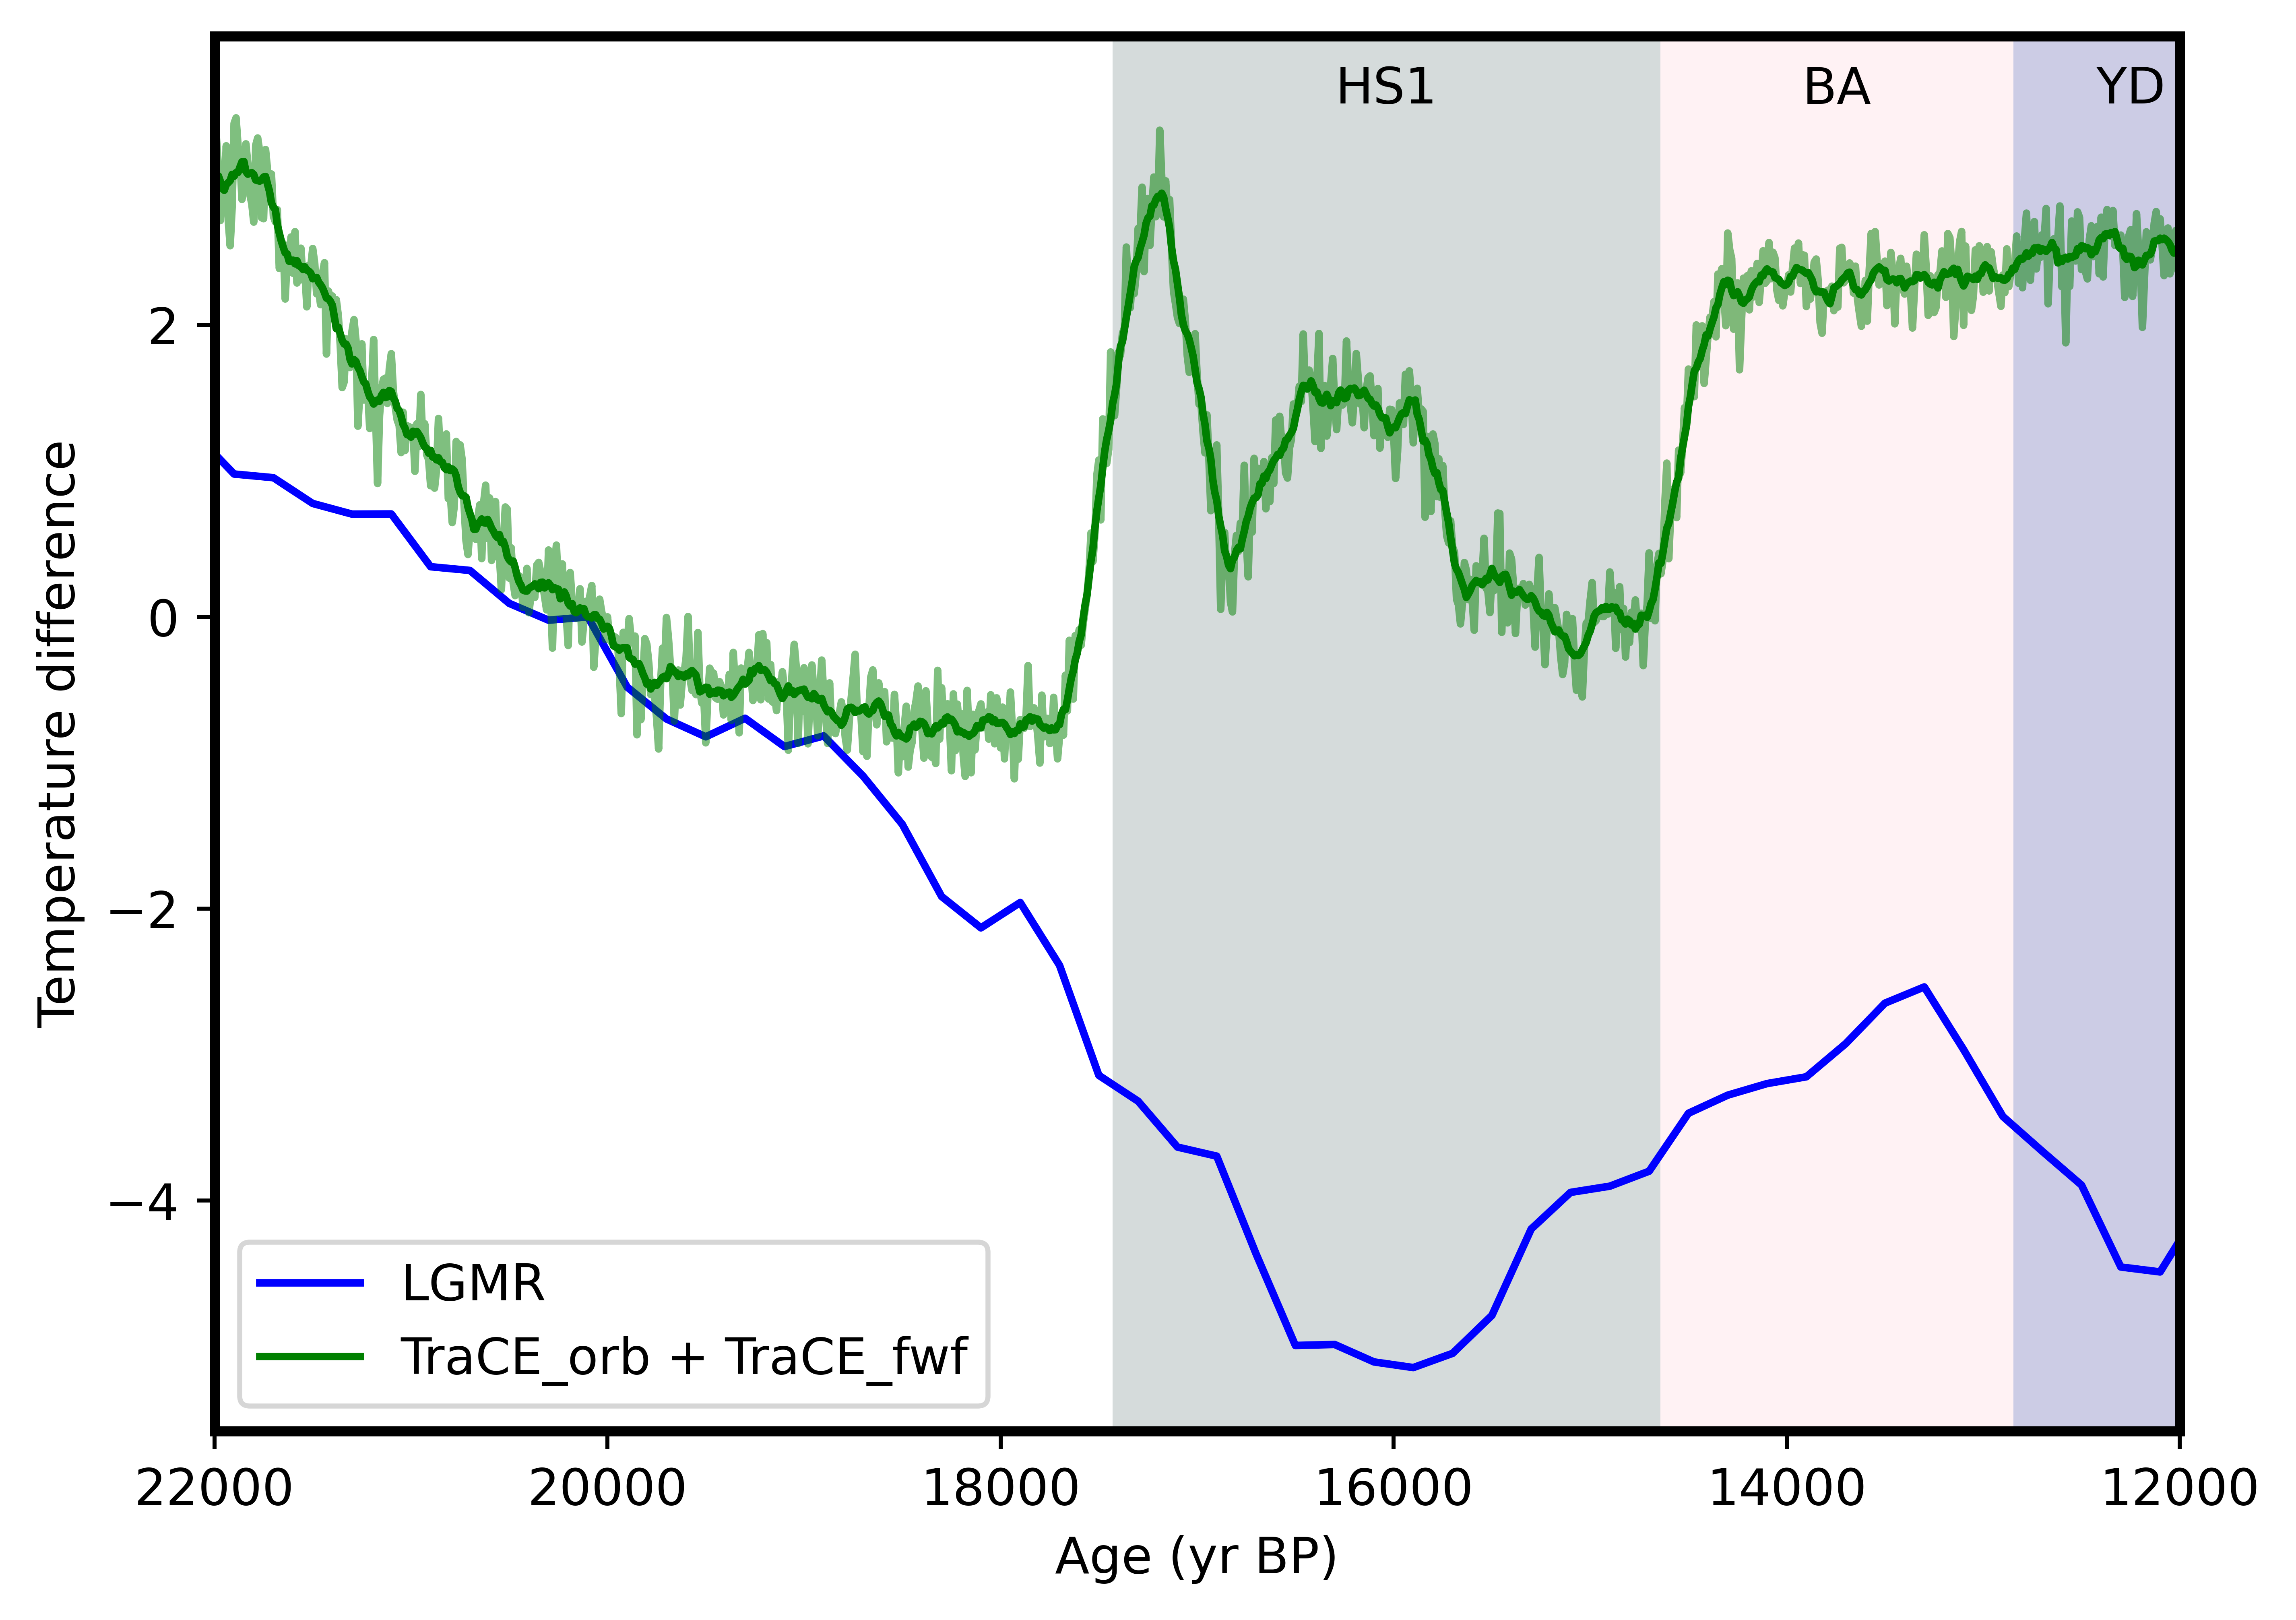

In [71]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Function to compute the moving average
def moving_average(a, n=10):
    return pd.Series(a).rolling(window=n, center=True, min_periods=1).mean().values

# Compute the normalized temperature differences and their moving averages
LGMR_N_S = (LGMR_N - LGMR_S)
# LGMR_N_S_ma = moving_average(LGMR_N_S, n=10)
# LGMR_N_S minors its value at age==20000
LGMR_N_S=LGMR_N_S-LGMR_N_S[LGMR_age==20100]

trace_orb_N_S = (trace_orb_N - trace_orb_S)
trace_orb_N_S_ma = moving_average(trace_orb_N_S, n=10)

trace_fwf_N_S = (trace_fwf_N - trace_fwf_S)
trace_fwf_N_S_ma = moving_average(trace_fwf_N_S, n=10)

# extent the trace_fwf_N_S and trace_fwf_N_S_ma (shape:(1904,)) to the same length as trace_orb_N_S (shape:(2204,)) by adding nan to the end of the trace_fwf_N_S and trace_fwf_N_S_ma
trace_fwf_N_S = np.append(trace_fwf_N_S, np.full(300, np.nan))
trace_fwf_N_S_ma = np.append(trace_fwf_N_S_ma, np.full(300, np.nan))


# # Interpolate trace_orb and trace_fwf data onto LGMR_age for alignment
# interp_func_orb = interp1d(trace_orb_age, trace_orb_N_S_ma, kind='linear', bounds_error=False, fill_value='extrapolate')
# trace_orb_N_S_ma_interp = interp_func_orb(LGMR_age)

# interp_func_fwf = interp1d(trace_fwf_age, trace_fwf_N_S_ma, kind='linear', bounds_error=False, fill_value='extrapolate')
# trace_fwf_N_S_ma_interp = interp_func_fwf(LGMR_age)

# Sum the interpolated trace_orb and trace_fwf data
sum_trace_orb_fwf = trace_orb_N_S + trace_fwf_N_S
sum_trace_orb_fwf= sum_trace_orb_fwf-sum_trace_orb_fwf[trace_age==20000]
sum_trace_orb_fwf_ma = moving_average(sum_trace_orb_fwf, n=10)

#

# Create a new figure
plt.figure(figsize=(7, 5),dpi=900)

# Plot LGMR data
plt.plot(LGMR_age, LGMR_N_S, label='LGMR', color='blue')

# Plot the sum of trace_orb and trace_fwf
plt.plot(trace_age, sum_trace_orb_fwf, label='', color='green', alpha=0.5)
plt.plot(trace_age, sum_trace_orb_fwf_ma, color='green', label='TraCE_orb + TraCE_fwf')

# Add labels and legend
plt.xlabel('Age (yr BP)')
plt.ylabel('Temperature difference')
# plt.title('LGMR vs Sum of TraCE_orb and TraCE_fwf')
plt.xlim([22000, 12000])
plt.legend()

# set the line width for all spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Optional: Add vertical grey bars for periods
HS1 = np.array([17480, 14692]) - 50  # Convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

plt.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0, zorder=-1)
plt.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0, zorder=-1)
plt.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0, zorder=-1)

# Add period labels
plt.text(np.mean(HS1), plt.ylim()[1]*0.95, 'HS1', ha='center', va='top')
plt.text(np.mean(BA), plt.ylim()[1]*0.95, 'BA', ha='center', va='top')
plt.text(np.mean(YD), plt.ylim()[1]*0.95, 'YD', ha='center', va='top')

plt.show()


# Compare the TraCE Orb + TraCE FWF and the LGMR, normalized

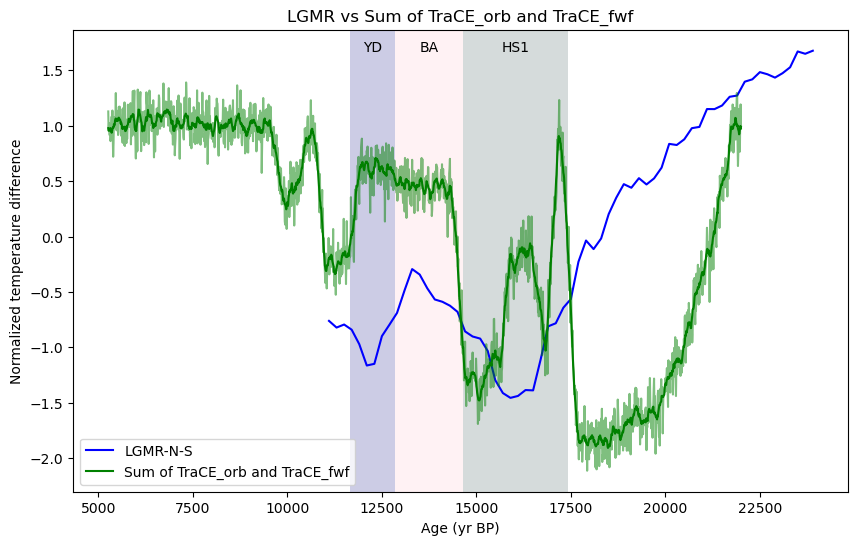

In [44]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Function to compute the moving average
def moving_average(a, n=10):
    return pd.Series(a).rolling(window=n, center=True, min_periods=1).mean().values

# Compute the normalized temperature differences and their moving averages
LGMR_N_S = zscore(LGMR_N - LGMR_S)
# LGMR_N_S_ma = moving_average(LGMR_N_S, n=10)

trace_orb_N_S = (trace_orb_N - trace_orb_S)
# trace_orb_N_S_ma = moving_average(trace_orb_N_S, n=10)

trace_fwf_N_S = (trace_fwf_N - trace_fwf_S)
# trace_fwf_N_S_ma = moving_average(trace_fwf_N_S, n=10)

# extent the trace_fwf_N_S and trace_fwf_N_S_ma (shape:(1904,)) to the same length as trace_orb_N_S (shape:(2204,)) by adding nan to the end of the trace_fwf_N_S and trace_fwf_N_S_ma
trace_fwf_N_S = np.append(trace_fwf_N_S, np.full(300, 0))
# trace_fwf_N_S_ma = np.append(trace_fwf_N_S_ma, np.full(300, 0))


# # Interpolate trace_orb and trace_fwf data onto LGMR_age for alignment
# interp_func_orb = interp1d(trace_orb_age, trace_orb_N_S_ma, kind='linear', bounds_error=False, fill_value='extrapolate')
# trace_orb_N_S_ma_interp = interp_func_orb(LGMR_age)

# interp_func_fwf = interp1d(trace_fwf_age, trace_fwf_N_S_ma, kind='linear', bounds_error=False, fill_value='extrapolate')
# trace_fwf_N_S_ma_interp = interp_func_fwf(LGMR_age)

# Sum the interpolated trace_orb and trace_fwf data
sum_trace_orb_fwf = (trace_orb_N_S + trace_fwf_N_S)
# drop the data after index 1675
sum_trace_orb_fwf = zscore(sum_trace_orb_fwf[:1675])
sum_trace_orb_fwf_ma = moving_average(sum_trace_orb_fwf, n=10)

#

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot LGMR data
plt.plot(LGMR_age, LGMR_N_S, label='LGMR-N-S', color='blue')

# Plot the sum of trace_orb and trace_fwf
plt.plot(trace_age[:1675], sum_trace_orb_fwf, label='', color='green', alpha=0.5)
plt.plot(trace_age[:1675], sum_trace_orb_fwf_ma, color='green', label='Sum of TraCE_orb and TraCE_fwf')
# plt.plot(trace_age, trace_orb_N_S, label='trace_orb', color='red', alpha=0.5)
# plt.plot(trace_age, trace_fwf_N_S, color='b', label='TraCE_fwf')

# Add labels and legend
plt.xlabel('Age (yr BP)')
plt.ylabel('Normalized temperature difference')
plt.title('LGMR vs Sum of TraCE_orb and TraCE_fwf')
# plt.xlim([22000, 12000])
plt.legend()

# Optional: Add vertical grey bars for periods
HS1 = np.array([17480, 14692]) - 50  # Convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

plt.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0, zorder=-1)
plt.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0, zorder=-1)
plt.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0, zorder=-1)

# Add period labels
plt.text(np.mean(HS1), plt.ylim()[1]*0.95, 'HS1', ha='center', va='top')
plt.text(np.mean(BA), plt.ylim()[1]*0.95, 'BA', ha='center', va='top')
plt.text(np.mean(YD), plt.ylim()[1]*0.95, 'YD', ha='center', va='top')

plt.show()
